### File information

File: Exercise_4.2_Charts.ipynb

Name: Amie Davis

Date: 10/19/2020

Course: DSC640 - Data Presentation & Visualization

Assignment Number: 4.2

Purpose: Build scatterplot, bubble chart, and density plot

Usage: Python 3.7.6

Developed using Jupter Notebook 6.0.3


References: https://matplotlib.org/

## Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [2]:
# Load TV data into dataframe
tv_data = "ex4-2/tv_sizes.txt" 
tv_df = pd.read_csv(tv_data, sep="\t")

# Show data
tv_df.head()

,year,size
0,2009,52
1,2009,40
2,2009,65
3,2009,46
4,2009,55


In [3]:
# Load Crime Rate data into dataframe
crime_data = "ex4-2/crimerates-by-state-2005.csv"
crime_df = pd.read_csv(crime_data)

# Show data
crime_df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [4]:
# Filter Data

# Crime Data
# Remove United States consolidated record
# Remove DC outlier.  Keep states only
crime_filt = crime_df[(crime_df.state != "United States") & (crime_df.state != "District of Columbia")]
crime_filt.head()
 
# TV Data
# Remove outlier
tv_filt = tv_df[(tv_df['size'] < 300)]
tv_filt.head()

,year,size
0,2009,52
1,2009,40
2,2009,65
3,2009,46
4,2009,55


## Scatterplot

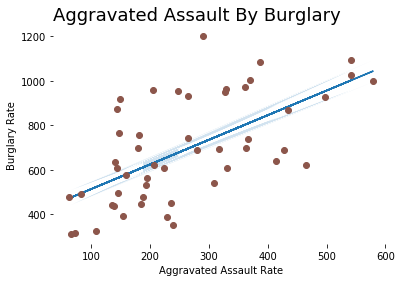

In [5]:
# Aggravated Assault vs. Burglary
# Using matplotlib

# Set data to correlate
x = crime_filt.aggravated_assault
y = crime_filt.burglary

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

# Setup figure w/o axes lines
plt.figure()
plt.axes(frameon=False)

# Scatterplot
plt.plot(x, y_est, '-')

# Area of Estimated Error
plt.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

# Best Fit Line
plt.plot(x, y, 'o', color='tab:brown')

# Set plot parameters
plt.title('Aggravated Assault By Burglary', loc='left', fontsize=18)
plt.xlabel('Aggravated Assault Rate')
plt.ylabel('Burglary Rate')

# Save plot to file
plt.savefig('Py_scatterplot.png', bbox_inches='tight')

# Show Plot
plt.show()


## Bubble Chart

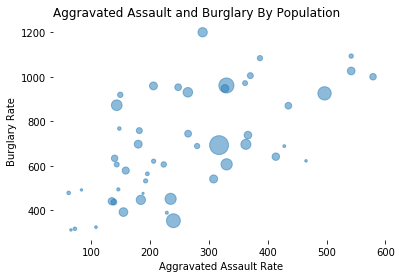

In [6]:
# Aggravated Assault vs. Burglary
# Using matplotlib

# Setup figure w/o axes lines
plt.figure()
plt.axes(frameon=False)

# Bubble Chart
plt.scatter(crime_filt.aggravated_assault, crime_filt.burglary, s=crime_filt.population/100000, alpha=0.5)

# Set plot parameters
plt.title('Aggravated Assault and Burglary By Population', loc='left')
plt.xlabel('Aggravated Assault Rate')
plt.ylabel('Burglary Rate')

# Save plot to file
plt.savefig('Py_bubble.png', bbox_inches='tight')

# Show Plot
plt.show()

## Density Plot

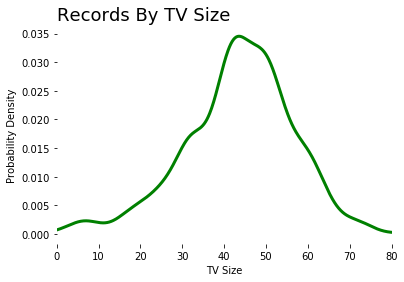

In [7]:
# Setup figure w/o axes lines
plt.axes(frameon=False)

# Density Plot
tv_filt['size'].plot(kind='density', linewidth=3, color="green")

# Set plot parameters
plt.title('Records By TV Size', loc='left', fontsize=18)
plt.xlabel('TV Size')
plt.ylabel('Probability Density')
plt.xlim(0, 80)

# Save plot to file
plt.savefig('Py_density.png', bbox_inches='tight')

# Show Plot
plt.show()